# Datos Reales

Para saber si los modelos que estamos generando van acorde a la realidad, debemos hacer una  comparación de dichos resultados con datos reales.

Este proceso se llama proceso de **validación**.

En caso de que el modelo no ajuste adecuadamente los datos experimentales, debemos analizar qué pudo haber salido mal y ajustar los parámetros libres del modelo. En caso extremo, deberemos re-plantear el modelo completamente.

# Crecimiento Poblacional



Recordemos nuestro modelo básico de población:

$$\frac{dP}{dt}=kP,\text{     }P(t_{0})=P_{0}$$

Usaremos ésta ecuación de la mano de datos reales para ver qué límites tiene dicha ecuación diferencial y cómo se ven las prediccióón frente a diferentes maracos que explicaremos a continuación.

# Estudios de Caso

## Estudio de Caso: Datos de una Comunidad

A continuación observamos ciertos datos experimentales de una comunidad (Tomados del libro de la UC cáp. 3, pág 119, [aquí](https://drive.google.com/open?id=1ol6HkGllJej8CnIXJhROCT0d7UL-AeYJ))

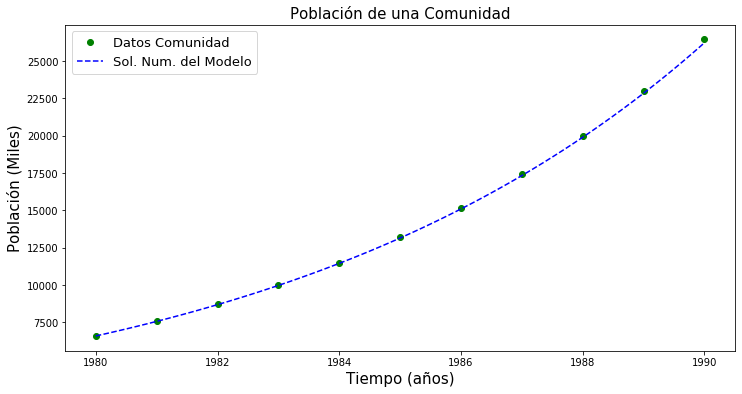

Prediction in 1990: 26222 Habitantes
Real Data  in 1990: 26440 Habitantes


In [1]:
import matplotlib.pyplot as plt
from Solver_EDO import RK4

#Datos
time1=[1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990]
pob1=[6597,7597,8708,10001,11491,13203,15170,17431,20003,23012,26440]

##Hip. Par.##
k=0.138 # 13.8% anual

f=lambda t,P:k*P
P0=pob1[0]
T=[time1[0],1990]
n=100

# Solución Numérica
t,P1=RK4(f,P0,T,n)

plt.figure(figsize=(12,6))

plt.plot(time1,pob1,'go',label="Datos Comunidad")
plt.plot(t,P1,'b--',label="Sol. Num. del Modelo")

plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Población (Miles)",fontsize=15)
plt.title("Población de una Comunidad",fontsize=15)

plt.legend(fontsize=13)
plt.show()

print("Prediction in 1990:",int(P1[-1]),"Habitantes")
print("Real Data  in 1990:",int(pob1[-1]),"Habitantes")

## Estudio de Caso: Población Mundial en el siglo XX:

A continuación observamos ciertos datos experimentales (Tomados del libro de la UC, [aquí](https://drive.google.com/drive/folders/1-NflGfM4mWpu1c2q1uUBl28nA0YNDkg3?usp=sharing))

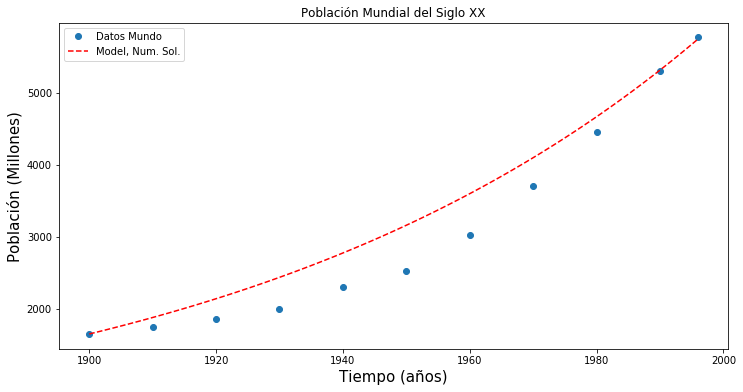

Prediction in 1996: 5747
Real Data  in 1996: 5770


In [2]:
import matplotlib.pyplot as plt
from Solver_EDO import RK38
time2=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,1996]
pob2=[1650,1750,1860,2000,2300,2520,3020,3700,4450,5300,5770]

k=0.013 # 1.29% anual

f=lambda t,P:k*P
P0=pob2[0]
T=[1900,1996]
n=100

t,P2=RK4(f,P0,T,n)

plt.figure(figsize=(12,6))
plt.plot(time2,pob2,'o',label="Datos Mundo")
plt.plot(t,P2,'r--',label="Model, Num. Sol.")
plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Población (Millones)",fontsize=15)
plt.title("Población Mundial del Siglo XX")
plt.legend()
plt.show()

print("Prediction in 1996:",int(P2[-1]))
print("Real Data  in 1996:",int(pob2[-1]))

## Estudio de Caso: Población en Kenya:

A continuación observamos ciertos datos experimentales (Tomados del libro de la UC, [aquí](https://drive.google.com/drive/folders/1-NflGfM4mWpu1c2q1uUBl28nA0YNDkg3?usp=sharing))

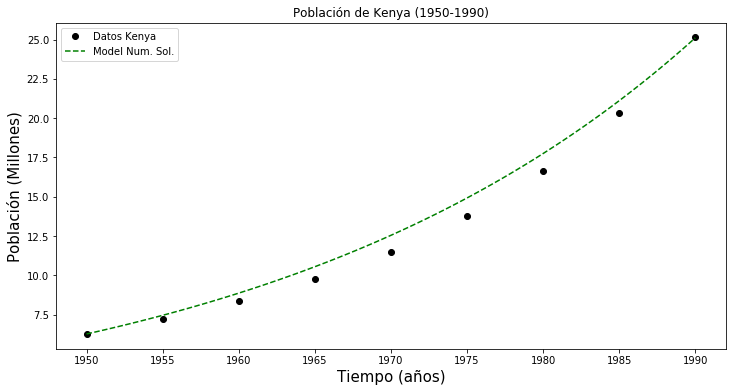

Prediction in 1990: 25102779
Real Data  in 1990: 25130000


In [3]:
import matplotlib.pyplot as plt
from Solver_EDO import RK38

time3=[1950,1955,1960,1965,1970,1975,1980,1985,1990]
pob3=[6.265,7.189,8.332,9.749,11.498,13.741,16.632,20.353,25.130]

k=0.0347 # 3.5% anual

f=lambda t,P:k*P
P0=pob3[0]
T=[1950,1990]
n=100

t,P3=RK38(f,P0,T,n)

plt.figure(figsize=(12,6))
plt.plot(time3,pob3,'ko',label="Datos Kenya")
plt.plot(t,P3,'g--',label="Model Num. Sol.")
plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Población (Millones)",fontsize=15)
plt.title("Población de Kenya (1950-1990)")
plt.legend()
plt.show()

print("Prediction in 1990:",int(P3[-1]*1e6))
print("Real Data  in 1990:",int(pob3[-1]*1e6))

# Regresión con los datos y su derivada

Como pudimos observar en los tres ejemplos anteriores, el modelo necesita ajustes y en general, no podemos asumir que la población crece con una tasa de crecimiento $k$ constante.

Para poder reallizar un modelo que eficientemente ajuste a los datos tenemos dos opciones:

- Ajustar los datos usando métodos estadísticos (No toca solucionar la ecuación diferencial).
- Ajustar la derivada de los datos y solucionar dicha ecuación.

## Explicación Intuitiva de la Derivada Numérica

Para ilustrar qué es lo que vamos a hacer, note la siguiente imagen (Tomado de [Wikipedia](https://en.wikipedia.org/wiki/Finite_difference#/media/File:Finite_difference_method.svg)):

![NumDer](https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Finite_difference_method.svg/800px-Finite_difference_method.svg.png)

## Derivada Numérica Hacia Adelante (FD)

En el ejemplo de población, veamos qué pasa si despejamos la tasa de crecimiento del modelo:

$$\frac{dP}{dt}\frac{1}{P}=k$$

Si aproximamos la derivada por

$$\frac{dP}{dt}\approx\frac{P(t+\Delta t)-P(t)}{\Delta t}$$

tendríamos el siguiente algoritmo:

$$\frac{P(t+h)-P(t)}{hP(t)}\approx k$$

**En conclusión, si hallamos la derivada numérica y dividimos en la población presente, deberíamos ver una recta horizontal.**

**Ésta sería una aproximación a la tasa de crecimiento $k$.**

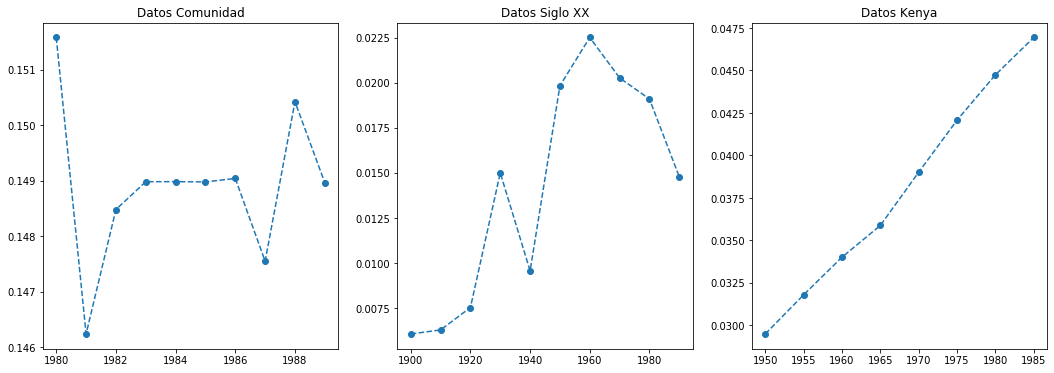

In [36]:
import numpy as np

def NumFD_Pob(datost,datosP):
    
    t=np.array(datost)
    P=np.array(datosP)
    n=len(t)-1
    ΔPΔt=np.zeros(n)
    
    for i in range(n):
        Δt=t[i+1]-t[i]
        ΔP=P[i+1]-P[i]
        ΔPΔt[i]=ΔP/(Δt*P[i])
        
    return ΔPΔt


#Numerical Derivatives
fd1=NumFD_Pob(time1,pob1)
fd2=NumFD_Pob(time2,pob2)
fd3=NumFD_Pob(time3,pob3)
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.plot(time1[:-1],fd1,'o--')
plt.title("Datos Comunidad")

plt.subplot(132)
plt.plot(time2[:-1],fd2,'o--')
plt.title("Datos Siglo XX")

plt.subplot(133)
plt.plot(time3[:-1],fd3,'o--')
plt.title("Datos Kenya")
plt.show()

**Vemos entonces que la hipótesis en la cual la tasa de crecimiento $k$ es una constante no es plausible con datos reales, por lo que debemos reformular nuestro modelo.**

## Derivadas Centrales Hacia Atrás (BD)

La anterior no es la única forma de aproximar la derivada, pues también podemos hacer la siguiente aproximación:

$$\frac{dP}{dt}\approx \frac{P(t)-P(t-h)}{h}$$

Hagamos el mismo análisis para ver si los resultados cambian:

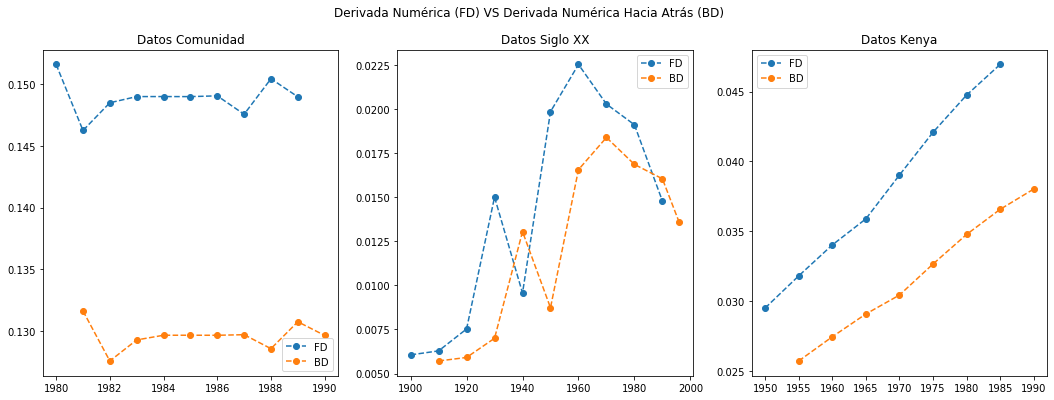

In [37]:
import numpy as np

def NumBD_Pob(datost,datosP):
    t=np.array(datost)
    P=np.array(datosP)
    n=len(t)-1
    ΔPΔt=np.zeros(n)
    
    for i in range(n):
        Δt=t[i+1]-t[i]
        ΔP=P[i+1]-P[i]
        ΔPΔt[i]=ΔP/(Δt*P[i+1])
        
    return ΔPΔt

#Numerical Derivatives
bd1=NumBD_Pob(time1,pob1)
bd2=NumBD_Pob(time2,pob2)
bd3=NumBD_Pob(time3,pob3)

plt.figure(figsize=(18,6))

plt.subplot(131)
plt.suptitle("Derivada Numérica (FD) VS Derivada Numérica Hacia Atrás (BD)")
plt.plot(time1[:-1],fd1,'o--',label='FD')
plt.plot(time1[1:],bd1,'o--',label='BD')
plt.title("Datos Comunidad")
plt.legend()

plt.subplot(132)
plt.plot(time2[:-1],fd2,'o--',label='FD')
plt.plot(time2[1:],bd2,'o--',label='BD')
plt.title("Datos Siglo XX")
plt.legend()

plt.subplot(133)
plt.plot(time3[:-1],fd3,'o--',label='FD')
plt.plot(time3[1:],bd3,'o--',label='BD')
plt.title("Datos Kenya")
plt.legend()

plt.show()

## Derivadas Centrales (CD)

Para asegurarnos de tener mayor estabilidad en la toma de la derivada, podemos hacer la siguiente aproximación:

$$\frac{dP}{dt}\approx \frac{P(t+h)-P(t-h)}{2h}$$

Hagamos el mismo análisis para ver si los resultados cambian:

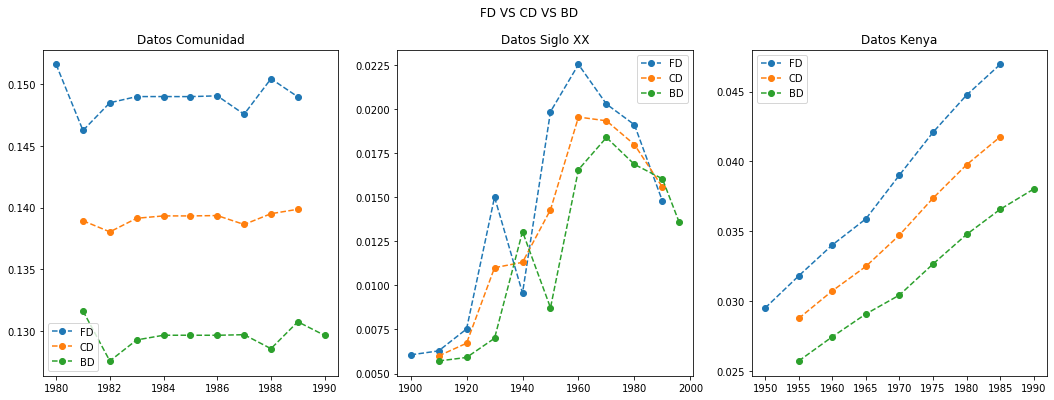

In [38]:
import numpy as np

def NumCD_Pob(datost,datosP):
    t=np.array(datost)
    P=np.array(datosP)
    n=len(t)-2
    ΔPΔt=np.zeros(n)
    
    for i in range(n):
        Δt=t[i+2]-t[i]
        ΔP=P[i+2]-P[i]
        ΔPΔt[i]=ΔP/(Δt*P[i+1])
        
    return ΔPΔt


#Numerical Derivatives
cd1=NumCD_Pob(time1,pob1)
cd2=NumCD_Pob(time2,pob2)
cd3=NumCD_Pob(time3,pob3)

plt.figure(figsize=(18,6))

plt.subplot(131)
plt.suptitle("FD VS CD VS BD")
plt.plot(time1[:-1],fd1,'o--',label='FD')
plt.plot(time1[1:-1],cd1,'o--',label='CD')
plt.plot(time1[1:],bd1,'o--',label='BD')

plt.title("Datos Comunidad")
plt.legend()

plt.subplot(132)
plt.plot(time2[:-1],fd2,'o--',label='FD')
plt.plot(time2[1:-1],cd2,'o--',label='CD')
plt.plot(time2[1:],bd2,'o--',label='BD')

plt.title("Datos Siglo XX")
plt.legend()

plt.subplot(133)
plt.plot(time3[:-1],fd3,'o--',label='FD')
plt.plot(time3[1:-1],cd3,'o--',label='CD')
plt.plot(time3[1:],bd3,'o--',label='BD')

plt.title("Datos Kenya")
plt.legend()

plt.show()

Vemos claramente que la **derivada central** da una mejor aproximación que las otras dos aproximaciones. 

Nuestro asunto ahora será haer las regresiones adecuadas para estimar $k$, que como nos estamos dando cuenta, no siempre es una constante.

# Tipos de Regresión (Derivadas):

### Regresión de una constante

De los anteriores caso de estudio, es claro que sólo en un caso podemos "suponer" que $k$ es constante.

Tratemos de estimar dicha constante.

Un método podría ser hallar un promedio matemático con los datos.

In [7]:
k=cd1.mean()
print(k)

0.13912328013589792


**¡Ajá!**, el número mágico hallado al principio del Notebook.

En este caso, el modelo es entonces

$$\frac{dP}{dt}=0.139P(t), \text{     }P(1980)=6597$$

Esto es muy raro en la vida real. Veamos los otros dos modelos.

### Regresión Lineal

En el caso de **Kenya**, vemos que este no es el caso y que debemos asumir que la tasa de crecimiento, en vez de ser una constante, es una **función que varía en el tiempo**.

Esto es algo muy normal de ver en la vida real, por lo que debemos acostumbrarnos a este trabajo.

Todo lo que sigue está sustentado en cursos vistos de estadística.

Para hacer una regresión lineal, podemos usar la libreria **stats** de **scipy** (Scientific Python) y **seaborn** para graficar la recta de regresión automáticamente.

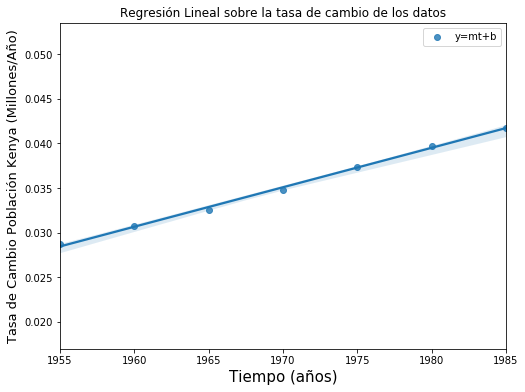


Results of Linear Regression:

LinregressResult(slope=0.0004424960971643828, intercept=-0.8366399158063762, rvalue=0.9983495853011054, pvalue=2.123500938797324e-07, stderr=1.1383454455907853e-05)


In [8]:
# Gráficos bonitos para estadística
#conda install seaborn -y
import seaborn as sn
# módulo para  hacer regresiones lineales y no lineales
from scipy import stats as st

# regresión Lineal
reg=st.linregress(time3[1:-1],cd3)

# Gráficos usando seaborn
plt.figure(figsize=(8,6))
sn.regplot(time3[1:-1],cd3,'o',label='y=mt+b')
plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Tasa de Cambio Población Kenya (Millones/Año)",fontsize=13)
plt.title("Regresión Lineal sobre la tasa de cambio de los datos")
plt.legend()
plt.show()

#Detalles de la regresión
print("\nResults of Linear Regression:\n")
print(reg)

### Regresión Cuadrática

Vemos que el caso de la **población del siglo XX**, ajustar un modelo no es nada fácil, pues no se ve alguna forma trivialmente conocida.

**Bueno...** eso depende del ojo experto. 

Vamos a hacer una regresión no lineal: Una **regresión cuadrática**.

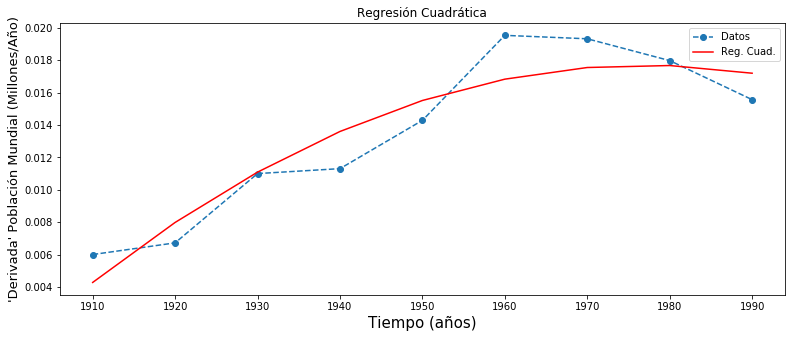

In [9]:
from scipy.optimize import curve_fit

# Ajustasr la parábola para la tasa de cambio de los datos
def model2(t,a,b,c):
    return a*t**2+b*t+c

params2,idn = curve_fit(model2, np.array(time2[1:-1]), cd2)
plt.figure(figsize=(13,5))
plt.plot(time2[1:-1],cd2,'o--',label="Datos")
plt.plot(time2[1:-1],model2(np.array(time2[1:-1]),*params2),'r-',label="Reg. Cuad.")
plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("'Derivada' Población Mundial (Millones/Año)",fontsize=13)
plt.title("Regresión Cuadrática")
plt.legend()
plt.show()

In [10]:
print(params2)

[-2.98558546e-06  1.18053102e-02 -1.16521520e+01]


Bueno... El resultado es bueno...**OK**

¿Podemos mejorar?

Intentemos un modelo cúbico:

### Regresión Cúbica

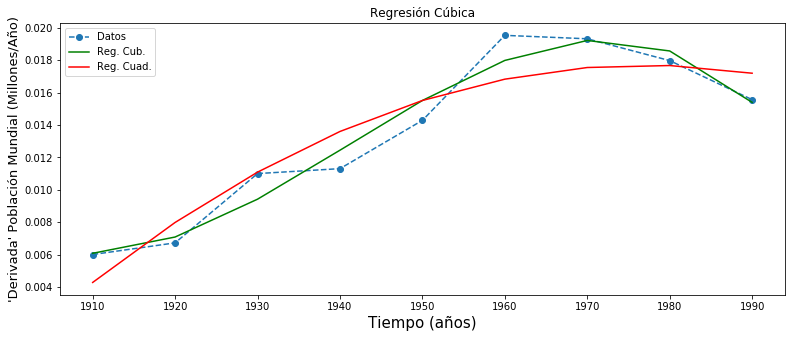

In [11]:
def model3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

params3,idn= curve_fit(model3, np.array(time2[1:-1]), cd2)

plt.figure(figsize=(13,5))
plt.plot(time2[1:-1],cd2,'o--',label="Datos")
plt.plot(time2[1:-1],model3(np.array(time2[1:-1]),*params3),'g-',label="Reg. Cub.")
plt.plot(time2[1:-1],model2(np.array(time2[1:-1]),*params2),'r-',label="Reg. Cuad.")
plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("'Derivada' Población Mundial (Millones/Año)",fontsize=13)
plt.title("Regresión Cúbica")
plt.legend()
plt.show()

**Vaya!** Sí que mejora la aproximación.

Quedémonos con ésta aproximación. Los valores de los coeficientes serían:

In [12]:
print(params3)

[-1.07142029e-07  6.23795304e-04 -1.21029103e+00  7.82546140e+02]


# Re-ajuste de los Modelos

### Comunidad:

Como ya vimos, el modelo que representa mejor los datos respecto de sus variaciones es:

$$\frac{dP}{dt}=0.13912328013589792P(t), \text{     }P(1980)=6597$$

In [13]:
print("k =",k)

k = 0.13912328013589792


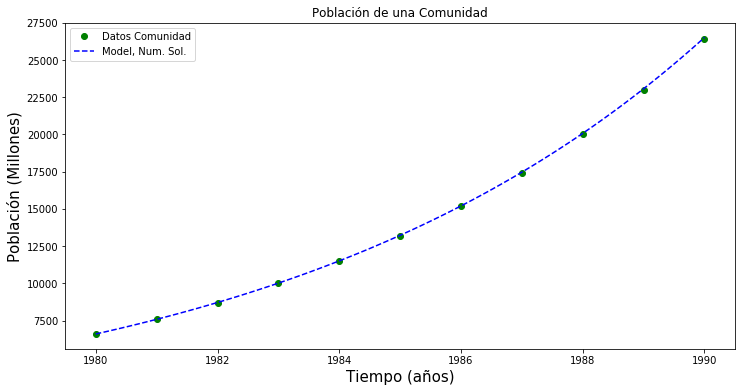

Prediction in 1990: 26518
Real Data  in 1990: 26440


In [14]:
f=lambda t,P:k*P
P0=pob1[0]
T=[1980,1990]
n=100

t,P1=RK4(f,P0,T,n)

plt.figure(figsize=(12,6))
plt.plot(time1,pob1,'go',label="Datos Comunidad")
plt.plot(t,P1,'b--',label="Model, Num. Sol.")

plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Población (Millones)",fontsize=15)
plt.title("Población de una Comunidad")

plt.legend()
plt.show()

print("Prediction in 1990:",int(P1[-1]))
print("Real Data  in 1990:",int(pob1[-1]))

### Kenya

Todo lo anterior quiere decir que un modelo más ajustado para los datos Kenyanos, **dados los datos experimentales**, podría ser:

$$\frac{dP}{dt}=(at+b)P(t),\text{    }P(1950)=6265$$

con $a=0.0004424960971643833,b=-0.8366399158063772$

Verifiquemos esto, resolviendo la ecuación diferencial numéricamente:

In [15]:
reg

LinregressResult(slope=0.0004424960971643828, intercept=-0.8366399158063762, rvalue=0.9983495853011054, pvalue=2.123500938797324e-07, stderr=1.1383454455907853e-05)

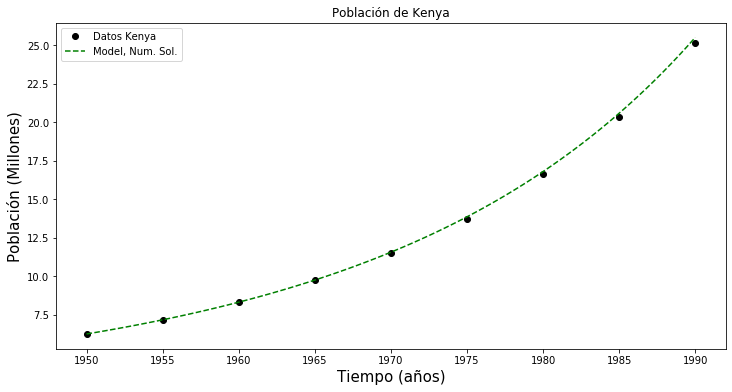

Prediction in 1990: 25484601
Real Data  in 1990: 25130000


In [16]:
a=reg.slope
b=reg.intercept

f=lambda t,P:(a*t+b)*P
P0=pob3[0]
T=[1950,1990]
n=100

t,P3=RK38(f,P0,T,n)

plt.figure(figsize=(12,6))
plt.plot(time3,pob3,'ko',label="Datos Kenya")
plt.plot(t,P3,'g--',label="Model, Num. Sol.")

plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Población (Millones)",fontsize=15)
plt.title("Población de Kenya")

plt.legend()
plt.show()

print("Prediction in 1990:",int(P3[-1]*1e6))
print("Real Data  in 1990:",int(pob3[-1]*1e6))

### Población Mundial del siglo XX

Recordemos nuestros parámetros hallados:

In [17]:
print("Parámetros del Modelo Cúbico:    ",params3)
print("Parámetros del Modelo Cuadrático:",params2)

Parámetros del Modelo Cúbico:     [-1.07142029e-07  6.23795304e-04 -1.21029103e+00  7.82546140e+02]
Parámetros del Modelo Cuadrático: [-2.98558546e-06  1.18053102e-02 -1.16521520e+01]


De nuestro análisis anterior, podemos deducir que nuestro modelo debería ser:

$$\frac{dP}{dt}=(at³+bt²+ct+d)P(t), \text{     }P(1900)=1650$$

con $a=-1.07142029e-07,b=6.23795304e-04,c=-1.21029103e+00,d=7.82546140e+02$

Verifiquemos esto, resolviendo la ecuación diferencial numéricamente:

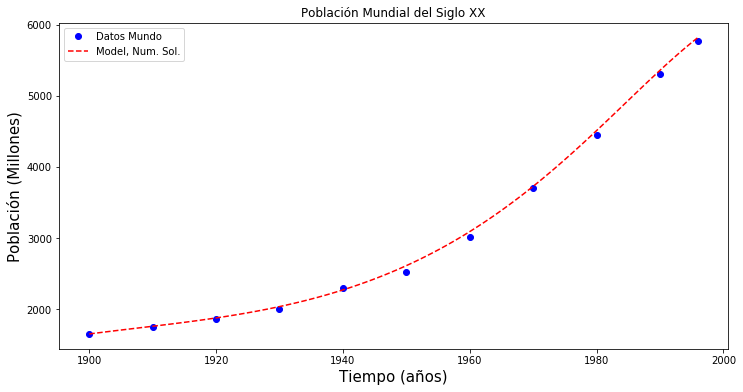

Población Estimada para 1996 : 5818 millones
Población Real para 1996 :     5770 millones


In [18]:
a,b,c,d=params3

f=lambda t,P:(a*t**3+b*t**2+c*t+d)*P
P0=pob2[0]
T=[1900,1996]
n=100

t,P2=RK4(f,P0,T,n)

plt.figure(figsize=(12,6))
plt.plot(time2,pob2,'bo',label="Datos Mundo")
plt.plot(t,P2,'r--',label="Model, Num. Sol.")

plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Población (Millones)",fontsize=15)
plt.title("Población Mundial del Siglo XX")
plt.legend()
plt.show()

print("Población Estimada para",T[1],":",int(P2[-1]),"millones")
print("Población Real para",time2[-1],":    ",int(pob2[-1]),"millones")

Con el modelo cuadrático, podemos deducir que nuestro modelo debería ser:

$$\frac{dP}{dt}=(at²+bt+c)P(t), \text{     }P(1900)=1650$$

con $a=-2.98558546e-06,b=1.18053102e-02,c=-1.16521520e+01$
   
Verifiquemos esto, resolviendo la ecuación diferencial numéricamente:

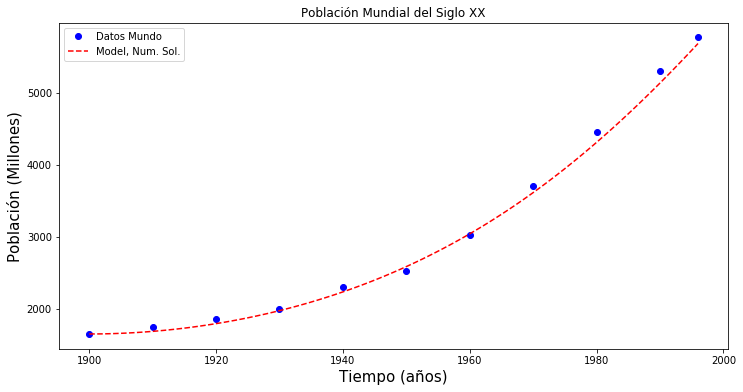

Población Estimada para 1996 : 5685 millones
Población Real para 1996 :     5770 millones


In [19]:
a,b,c=params2

f=lambda t,P:(a*t**2+b*t+c)*P
P0=pob2[0]
T=[1900,1996]
n=100

t,P2=RK38(f,P0,T,n)

plt.figure(figsize=(12,6))
plt.plot(time2,pob2,'bo',label="Datos Mundo")
plt.plot(t,P2,'r--',label="Model, Num. Sol.")
plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Población (Millones)",fontsize=15)
plt.title("Población Mundial del Siglo XX")

plt.legend()
plt.show()

print("Población Estimada para",T[1],":",int(P2[-1]),"millones")
print("Población Real para",time2[-1],":    ",int(pob2[-1]),"millones")

## Modelos más Simples

### Modelo Cuadrático

Ahora analicemos el segundo punto. Tratemos de solamente ajustar los datos usando nada más que los datos.

Como vemos a ojo desnudo el modelo puede ser exponencial, pero también puede **ajustar** una parábola, hagamos un modelo de regresión cuadrática sobre los datos:

$$P(t)=at²+bt+c$$

y tratemos de hallar lo parámetros $a,b,c$ que ajustan los datos.

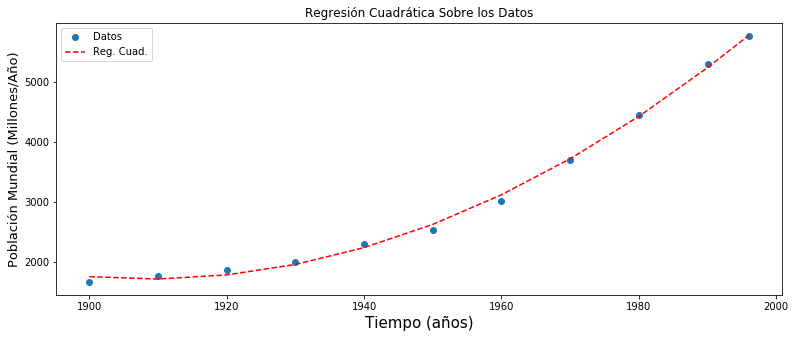

Población Estimada para 1996 : 5782 millones
Población Real para 1996 :     5770 millones


In [20]:
from scipy.optimize import curve_fit

def model4(x,a,b,c):
    return a*x**2+b*x+c

params4,idn = curve_fit(model4, np.array(time2), pob2)
a,b,c=params4

P4=a*t**2+b*t+c

plt.figure(figsize=(13,5))
plt.plot(time2,pob2,'o',label="Datos")
plt.plot(time2,model4(np.array(time2),*params4),'r--',label="Reg. Cuad.")
plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Población Mundial (Millones/Año)",fontsize=13)
plt.title("Regresión Cuadrática Sobre los Datos")
plt.legend()
plt.show()

print("Población Estimada para",T[1],":",int(P4[-1]),"millones")
print("Población Real para",time2[-1],":    ",int(pob2[-1]),"millones")

### Modelo Cúbico

También puede **ajustar** una función cúbica, hagamos un modelo de regresión cuadrática sobre los datos:

$$P(t)=at³+bt²+ct+d$$

y tratemos de hallar lo parámetros $a,b,c,d$ que ajustan los datos.

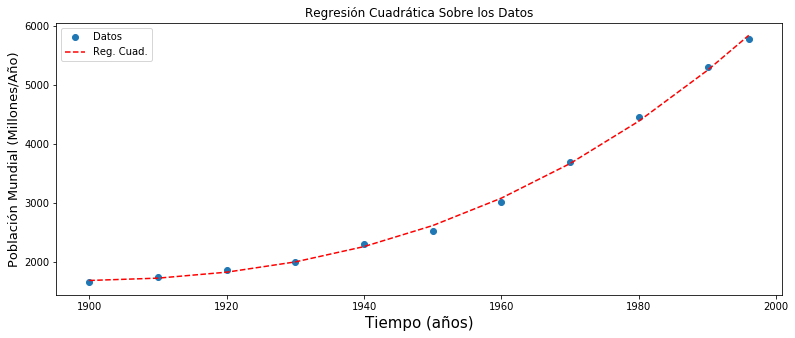

Población Estimada para 1996 : 5839 millones
Población Real para 1996 :     5770 millones


In [21]:
from scipy.optimize import curve_fit

def model5(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

params5,idn = curve_fit(model5, np.array(time2), pob2)
a,b,c,d=params5

P5=a*t**3+b*t**2+c*t+d

plt.figure(figsize=(13,5))
plt.plot(time2,pob2,'o',label="Datos")
plt.plot(time2,model5(np.array(time2),*params5),'r--',label="Reg. Cuad.")
plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Población Mundial (Millones/Año)",fontsize=13)
plt.title("Regresión Cuadrática Sobre los Datos")
plt.legend()
plt.show()

print("Población Estimada para",T[1],":",int(P5[-1]),"millones")
print("Población Real para",time2[-1],":    ",int(pob2[-1]),"millones")


## Comparación de Modelos

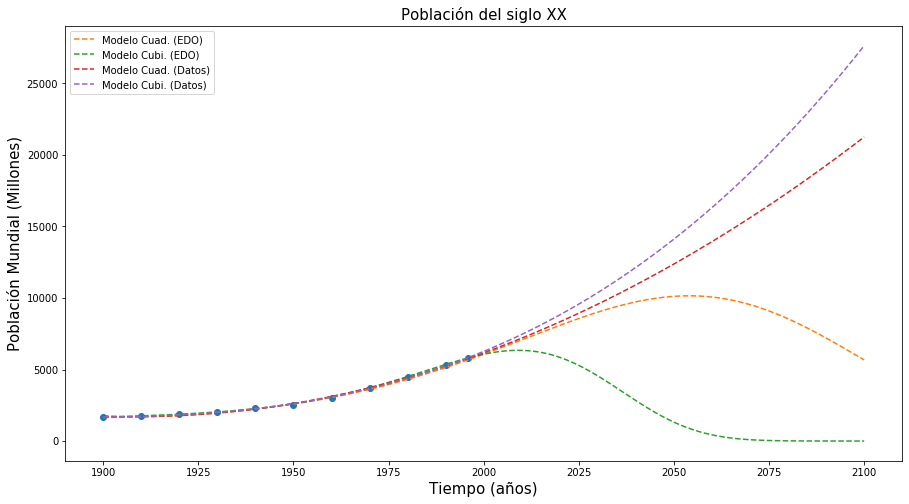

Población Estimada para 2100  Modelo Cuadrático (EDO) : 5672 millones
Población Estimada para 2100  Modelo Cúbico     (EDO) : 0 millones
Población Estimada para 2100  Modelo Cuadrático (Data): 21254 millones
Población Estimada para 2100  Modelo Cúbico     (Data): 27638 millones
Población Real para 1996  con Datos Exerimentales     : 5770 millones


In [22]:
a1,b1,c1=params2
f2=lambda t,P:(a1*t**2+b1*t+c1)*P

a,b,c,d=params3
f3=lambda t,P:(a*t**3+b*t**2+c*t+d)*P

P0=pob2[0]
T=[1900,2100]
n=1000

# Modelo de EDO
t,P2=RK38(f2,P0,T,n)
t,P3=RK38(f3,P0,T,n)

# MOdelo Estadistico de ajuste de curvas
a,b,c=params4
P4=a*t**2+b*t+c

a,b,c,d=params5
P5=a*t**3+b*t**2+c*t+d


plt.figure(figsize=(15,8))
plt.plot(time2,pob2,'o')
plt.plot(t,P2,'--',label='Modelo Cuad. (EDO)')
plt.plot(t,P3,'--',label='Modelo Cubi. (EDO)')
plt.plot(t,P4,'--',label='Modelo Cuad. (Datos)')
plt.plot(t,P5,'--',label='Modelo Cubi. (Datos)')
plt.xlabel("Tiempo (años)",fontsize=15)
plt.ylabel("Población Mundial (Millones)",fontsize=15)
plt.title("Población del siglo XX",fontsize=15)
plt.legend()
plt.show()

print("Población Estimada para",T[1]," Modelo Cuadrático (EDO) :",int(P2[-1]),"millones")
print("Población Estimada para",T[1]," Modelo Cúbico     (EDO) :",int(P3[-1]),"millones")
print("Población Estimada para",T[1]," Modelo Cuadrático (Data):",int(P4[-1]),"millones")
print("Población Estimada para",T[1]," Modelo Cúbico     (Data):",int(P5[-1]),"millones")
print("Población Real para",time2[-1]," con Datos Exerimentales     :",int(pob2[-1]),"millones")